Calculando Elbow y Silhouette: 100%|████████████████████████████████████████████████████| 34/34 [25:27<00:00, 44.91s/it]


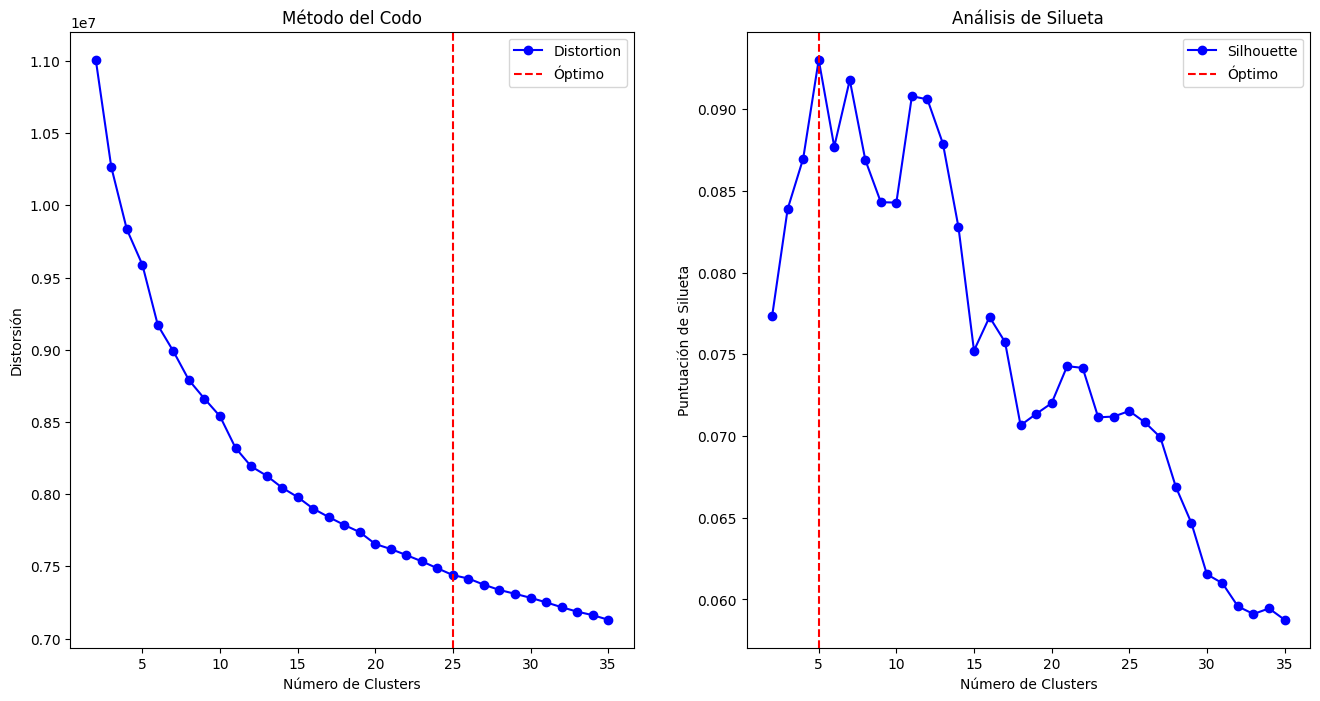

/home/fbaquero/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


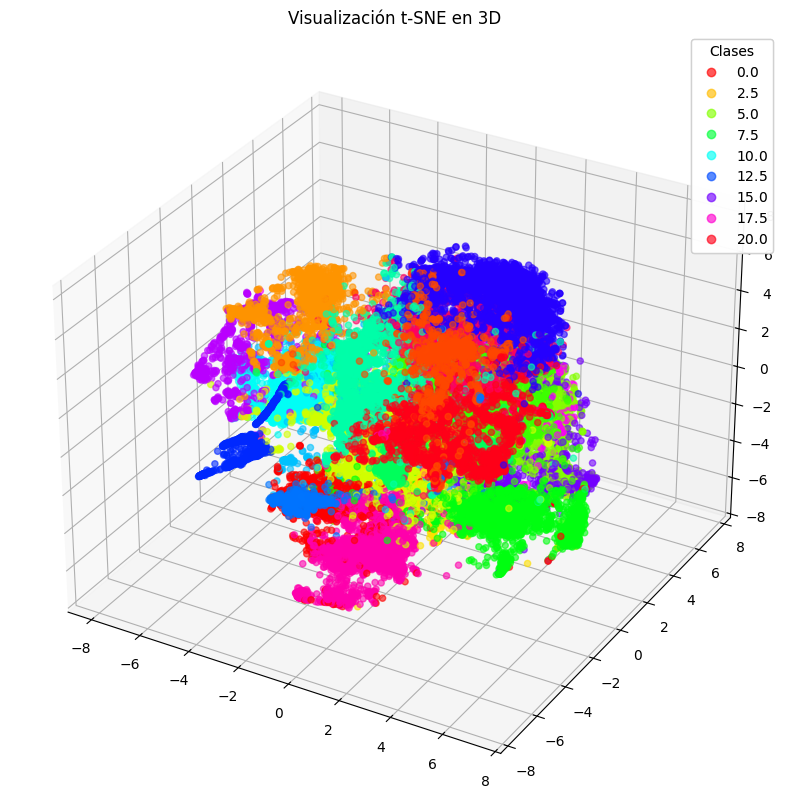

Calculando BIC y AIC:   5%|██▉                                                        | 1/20 [11:03<3:30:13, 663.87s/it]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
import json
import jsonlines
import os
from PIL import Image
import random
from mpl_toolkits.mplot3d import Axes3D

# Configuración de rutas
features_file = '/home/fbaquero/tesis/tesisfinal/nodistorcion.jsonl'
root_dir = '/media/databases/tiputini/'

# Leer las características del archivo JSONL
features = []
image_paths = []
with jsonlines.open(features_file) as reader:
    for obj in reader:
        for detection in obj['detectors']['megadetectorV5']['output']['detections']:
            if 'features' in detection:
                features.append(detection['features'])
                image_paths.append(os.path.join(root_dir, obj['paths'][0]))

features = np.array(features)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm

# Método del Codo y Análisis de Silueta
def plot_elbow_silhouette(data, max_clusters=35):
    distortions = []
    silhouettes = []
    K = range(2, max_clusters + 1)
    
    for k in tqdm(K, desc="Calculando Elbow y Silhouette"):
        kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init='auto')
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        # Intentar calcular la silueta y manejar cualquier posible error
        try:
            silhouette_avg = silhouette_score(data, kmeans.labels_)
        except ValueError:
            silhouette_avg = np.nan
        silhouettes.append(silhouette_avg)
    
    # Método del Codo
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(K, distortions, 'bo-', label='Distortion')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Distorsión')
    plt.title('Método del Codo')
    
    # Usar una librería como kneed para encontrar el punto óptimo
    try:
        from kneed import KneeLocator
        kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')
        plt.axvline(x=kn.knee, color='r', linestyle='--', label='Óptimo')
    except ImportError:
        plt.axvline(x=K[np.argmax(np.diff(distortions))], color='r', linestyle='--', label='Óptimo')
    
    plt.legend()

    # Análisis de Silueta
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouettes, 'bo-', label='Silhouette')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación de Silueta')
    plt.title('Análisis de Silueta')
    plt.axvline(x=K[np.nanargmax(silhouettes)], color='r', linestyle='--', label='Óptimo')
    plt.legend()
    
    plt.show()



# Visualización t-SNE en 3D
def plot_tsne(data, labels):
    tsne = TSNE(n_components=3, random_state=42, perplexity=50, n_iter=300)
    tsne_results = tsne.fit_transform(data)
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        tsne_results[:,0], tsne_results[:,1], tsne_results[:,2], 
        c=labels, cmap='hsv', alpha=0.6
    )
    legend1 = ax.legend(*scatter.legend_elements(), title="Clases")
    ax.add_artist(legend1)
    ax.set_title('Visualización t-SNE en 3D')
    plt.show()


# Gráfica de BIC y AIC
def plot_bic_aic(data, max_clusters=21):
    bics = []
    aics = []
    K = range(2, max_clusters + 1)
    
    for k in tqdm(K, desc="Calculando BIC y AIC"):
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data)
        bics.append(gmm.bic(data))
        aics.append(gmm.aic(data))
    
    plt.figure(figsize=(16, 8))
    plt.plot(K, bics, 'bo-', label='BIC')
    plt.plot(K, aics, 'go-', label='AIC')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación')
    plt.title('BIC y AIC para diferentes números de clusters')
    plt.axvline(x=K[np.argmin(bics)], color='r', linestyle='--', label='BIC Óptimo')
    plt.axvline(x=K[np.argmin(aics)], color='b', linestyle='--', label='AIC Óptimo')
    plt.legend()
    plt.show()


# Ejecutar los análisis y visualizaciones
plot_elbow_silhouette(features)
optimal_clusters = 21  # Cambia esto al número óptimo basado en los gráficos anteriores

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, init='k-means++', n_init='auto')
labels = kmeans.fit_predict(features)
plot_tsne(features, labels)
plot_bic_aic(features)




Calculando Elbow y Silhouette: 100%|██████████████████████████████████████████████████████| 5/5 [01:47<00:00, 21.59s/it]


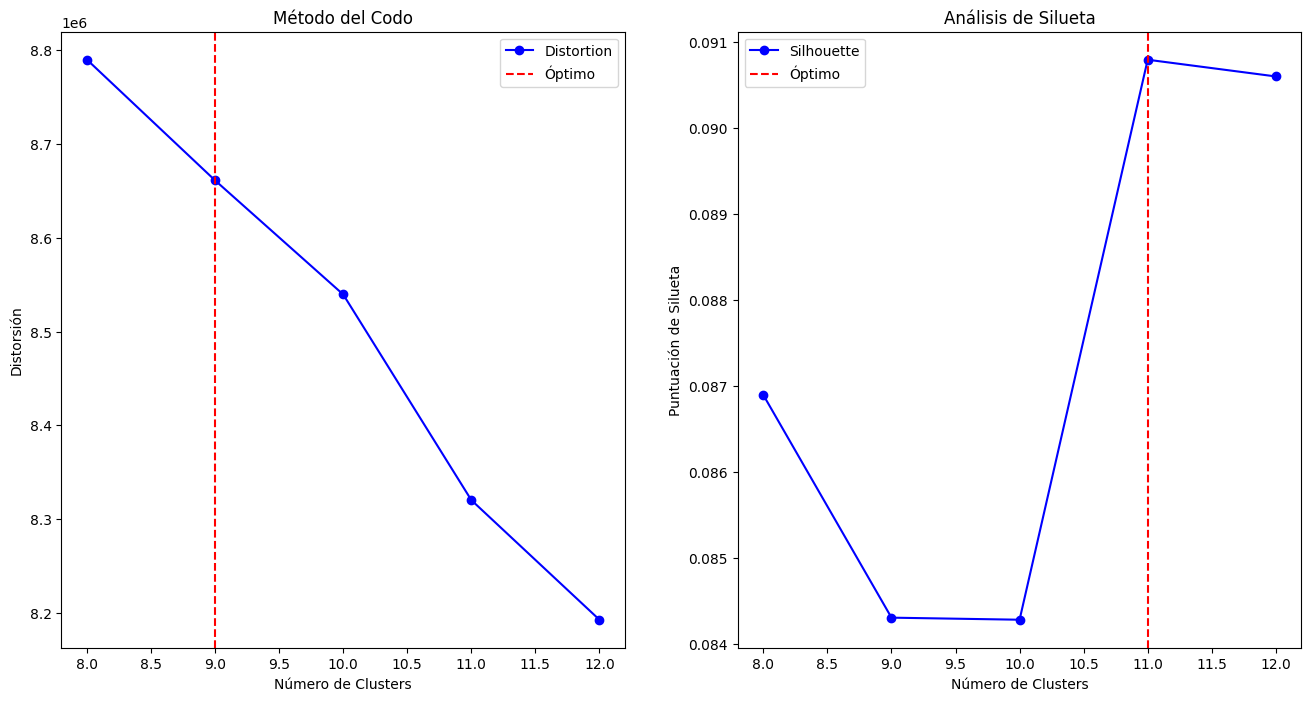

/home/fbaquero/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

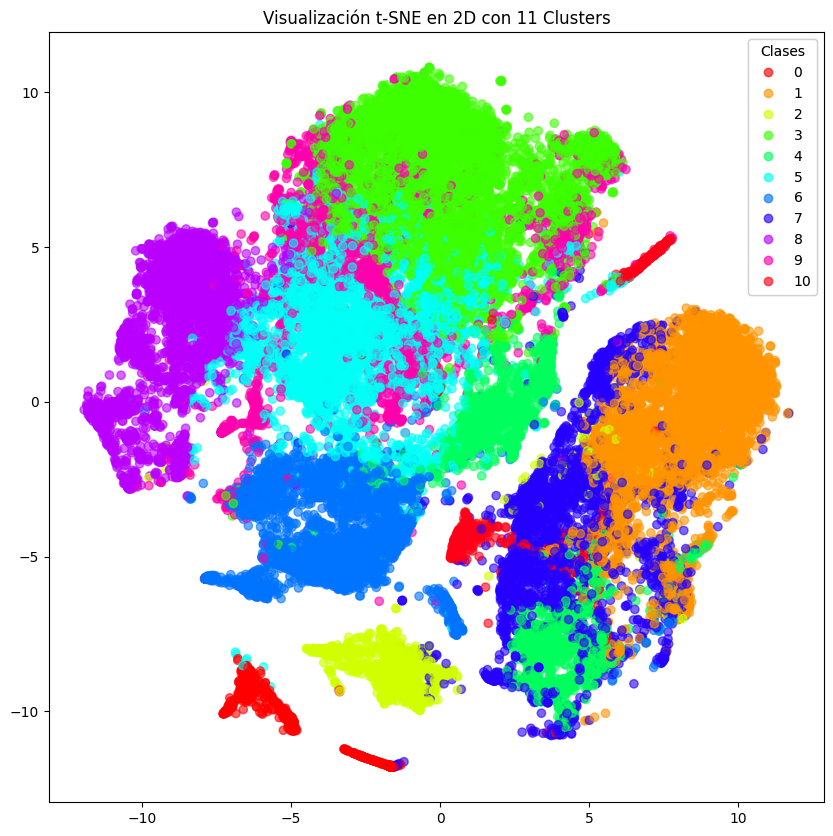

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
import jsonlines
import os
from PIL import Image
import random

# Configuración de rutas
features_file = '/home/fbaquero/tesis/tesisfinal/nodistorcion.jsonl'
root_dir = '/media/databases/tiputini/'

# Leer las características del archivo JSONL
features = []
image_paths = []
with jsonlines.open(features_file) as reader:
    for obj in reader:
        for detection in obj['detectors']['megadetectorV5']['output']['detections']:
            if 'features' in detection:
                features.append(detection['features'])
                image_paths.append(os.path.join(root_dir, obj['paths'][0]))

features = np.array(features)

# Método del Codo y Análisis de Silueta
def plot_elbow_silhouette(data, min_clusters=8, max_clusters=12):
    distortions = []
    silhouettes = []
    K = range(min_clusters, max_clusters + 1)
    
    for k in tqdm(K, desc="Calculando Elbow y Silhouette"):
        kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init='auto')
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        try:
            silhouette_avg = silhouette_score(data, kmeans.labels_)
        except ValueError:
            silhouette_avg = np.nan
        silhouettes.append(silhouette_avg)
    
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(K, distortions, 'bo-', label='Distortion')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Distorsión')
    plt.title('Método del Codo')

    try:
        from kneed import KneeLocator
        kn = KneeLocator(K, distortions, curve='convex', direction='decreasing')
        plt.axvline(x=kn.knee, color='r', linestyle='--', label='Óptimo')
    except ImportError:
        plt.axvline(x=K[np.argmax(np.diff(distortions))], color='r', linestyle='--', label='Óptimo')
    
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(K, silhouettes, 'bo-', label='Silhouette')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación de Silueta')
    plt.title('Análisis de Silueta')
    plt.axvline(x=K[np.nanargmax(silhouettes)], color='r', linestyle='--', label='Óptimo')
    plt.legend()
    
    plt.show()

# Visualización t-SNE en 2D con imágenes representativas por clúster
def plot_tsne_with_images(data, labels, image_paths, n_clusters=11):
    tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=300)
    tsne_results = tsne.fit_transform(data)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter = ax.scatter(
        tsne_results[:, 0], tsne_results[:, 1],
        c=labels, cmap='hsv', alpha=0.6
    )
    legend1 = ax.legend(*scatter.legend_elements(), title="Clases")
    ax.add_artist(legend1)
    ax.set_title(f'Visualización t-SNE en 2D con {n_clusters} Clusters')

    # Agregar imágenes representativas para cada clúster
    unique_labels = np.unique(labels)
    for label in unique_labels:
        label_indices = np.where(labels == label)[0]
        selected_index = random.choice(label_indices)
        x, y = tsne_results[selected_index, 0], tsne_results[selected_index, 1]
        
        img_path = image_paths[selected_index]
        img = Image.open(img_path)
        img.thumbnail((50, 50), Image.ANTIALIAS)
        imgbox = OffsetImage(img, zoom=0.5)
        ab = AnnotationBbox(imgbox, (x, y), frameon=False)
        ax.add_artist(ab)
    
    plt.show()

# Gráfica de BIC y AIC
def plot_bic_aic(data, min_clusters=10, max_clusters=15):
    bics = []
    aics = []
    K = range(min_clusters, max_clusters + 1)
    
    for k in tqdm(K, desc="Calculando BIC y AIC"):
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data)
        bics.append(gmm.bic(data))
        aics.append(gmm.aic(data))
    
    plt.figure(figsize=(16, 8))
    plt.plot(K, bics, 'bo-', label='BIC')
    plt.plot(K, aics, 'go-', label='AIC')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación')
    plt.title('BIC y AIC para diferentes números de clusters')
    plt.axvline(x=K[np.argmin(bics)], color='r', linestyle='--', label='BIC Óptimo')
    plt.axvline(x=K[np.argmin(aics)], color='b', linestyle='--', label='AIC Óptimo')
    plt.legend()
    plt.show()

# Ejecutar los análisis y visualizaciones
plot_elbow_silhouette(features)
optimal_clusters = 11  # Basado en el análisis, ajusta si es necesario

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, init='k-means++', n_init='auto')
labels = kmeans.fit_predict(features)
plot_tsne_with_images(features, labels, image_paths, n_clusters=optimal_clusters)
plot_bic_aic(features)


In [6]:
import json
import numpy as np
import pandas as pd
import os
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

# Configuración de rutas
features_file = '/home/fbaquero/tesis/tesisfinal/nodistorcion.jsonl'
root_dir = '/media/databases/tiputini/'

# Función para cargar los datos desde el archivo JSONL
def load_jsonl(file_path, confidence_threshold=0.9, category=0):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            item = json.loads(line)
            for detection in item['detectors']['megadetectorV5']['output']['detections']:
                # Verificar que 'confidence' sea un número y 'category' sea un valor esperado
                if isinstance(detection.get('confidence'), (int, float)) and \
                   detection['confidence'] >= confidence_threshold and \
                   detection.get('category') == category:
                    item_data = {
                        'features': detection['features'],
                        'path': os.path.join(root_dir, item['paths'][0]),
                        'bbox': detection.get('bbox', None)
                    }
                    data.append(item_data)
    return data

# Cargar el archivo JSONL con filtro de confianza
data = load_jsonl(features_file)

# Extraer características
X = np.array([item['features'] for item in data])

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar GMM con un número específico de clusters
n_clusters = 7
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0, init_params='kmeans').fit(X_scaled)
labels = gmm.predict(X_scaled)
probabilities = gmm.predict_proba(X_scaled)

# Crear DataFrame con las características, labels, probabilidades y rutas completas de las imágenes
features_df = pd.DataFrame(data)
features_df['labels'] = labels
features_df['max_probability'] = probabilities.max(axis=1)

# Realizar muestreo estratificado por cluster proporcional
def stratified_sampling(X, labels, sample_size):
    unique_labels, counts = np.unique(labels, return_counts=True)
    sample_indices = []

    total_counts = np.sum(counts)
    for label, count in zip(unique_labels, counts):
        label_indices = np.where(labels == label)[0]
        sample_size_per_label = int(sample_size * (count / total_counts))
        sample_size_per_label = min(len(label_indices), sample_size_per_label)
        if sample_size_per_label == 0:
            print(f"Warning: Cluster {label} tiene menos imágenes que el tamaño de muestra especificado.")
            continue
        sample_indices.extend(np.random.choice(label_indices, sample_size_per_label, replace=False))

    return X[sample_indices], labels[sample_indices], sample_indices

# Realizar el muestreo estratificado
sample_size = 20000
X_sampled, labels_sampled, sampled_indices = stratified_sampling(X_scaled, labels, sample_size)

# Obtener los centroides del GMM
centroids = gmm.means_

# Concatenar los datos muestreados y los centroides
data_with_centroids = np.vstack([X_sampled, centroids])

# Aplicar t-SNE incluyendo los centroides
tsne = TSNE(n_components=2, learning_rate='auto', random_state=0, perplexity=50, max_iter=3000)
X_tsne_with_centroids = tsne.fit_transform(data_with_centroids)

# Separar los datos transformados
X_tsne = X_tsne_with_centroids[:-n_clusters]
centroids_tsne = X_tsne_with_centroids[-n_clusters:]

# Definir colores distintivos para cada cluster
colors = [
    'red', 'yellow', 'blue', 'orange', 'purple', 
    'green', 'cyan', 'pink', 'brown', 'magenta',
    'lime', 'navy', 'gold', 'coral', 'salmon',
    'teal', 'turquoise', 'violet', 'grey', 'black'
]

# Graficar los resultados de t-SNE con colores distintivos y centroides
plt.figure(figsize=(12, 6))
for i in range(n_clusters):
    indices = labels_sampled == i
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], color=colors[i], label=f'Cluster {i}', marker='o', alpha=0.5)
plt.title(f'Visualización t-SNE de GMM con k={n_clusters}')
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.legend(loc='best', fontsize='small')
plt.show()

# Función para mostrar imágenes en clusters
def show_random_images_in_clusters(features_df, n_clusters):
    for cluster in range(n_clusters):
        cluster_images = features_df[features_df['labels'] == cluster]
        num_images = len(cluster_images)
        
        print(f"\nCluster {cluster} ({num_images} imágenes):")
        
        sample_size = min(50, num_images)
        if sample_size == 0:
            print(f"El cluster {cluster} no tiene imágenes para mostrar.")
            continue
        
        sample_images = cluster_images[['path', 'bbox']].sample(n=sample_size, random_state=0).to_dict('records')
        
        # Calcular el número de filas y columnas para los subplots
        n_cols = 10
        n_rows = (sample_size + n_cols - 1) // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 2 * n_rows))
        axes = axes.flatten()
        
        for ax, image_info in zip(axes, sample_images):
            if not os.path.exists(image_info['path']):
                print(f"Error: La imagen {image_info['path']} no existe.")
                ax.axis('off')
                continue
            try:
                img = Image.open(image_info['path'])
                x, y, right, bottom = image_info['bbox']

                width = right - x
                height = bottom - y
                side_length = max(width, height)
                
                left = int(max(x - (side_length - width) // 2, 0))
                right = int(min(x + width + (side_length - width) // 2, img.width))
                top = int(max(y - (side_length - height) // 2, 0))
                bottom = int(min(y + height + (side_length - height) // 2, img.height))

                cropped_img = img.crop((left, top, right, bottom))
                ax.imshow(cropped_img)
                ax.set_title(f'Cluster {cluster+1}')
                ax.axis('off')
            except Exception as e:
                print(f"Error loading image {image_info['path']}: {e}")
                ax.axis('off')
        
        for ax in axes[len(sample_images):]:
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()

# Mostrar imágenes aleatorias en los clusters
show_random_images_in_clusters(features_df, n_clusters)

# Histograma de probabilidades máximas de pertenencia al cluster asignado
plt.figure(figsize=(10, 6))
plt.hist(features_df['max_probability'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Probabilidad de pertenencia al cluster asignado')
plt.ylabel('Número de imágenes')
plt.title('Distribución de probabilidades de pertenencia al cluster (GMM)')
plt.show()

# Histograma de probabilidades por cluster
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    cluster_probs = features_df[features_df['labels'] == cluster]['max_probability']
    plt.hist(cluster_probs, bins=50, alpha=0.5, label=f'Cluster {cluster}')
plt.xlabel('Probabilidad de pertenencia al cluster')
plt.ylabel('Número de imágenes')
plt.title('Distribución de probabilidades por cluster (GMM)')
plt.legend()
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Calculando Elbow y Silhouette: 100%|████████████████████████████████████████████████████| 10/10 [06:39<00:00, 39.91s/it]


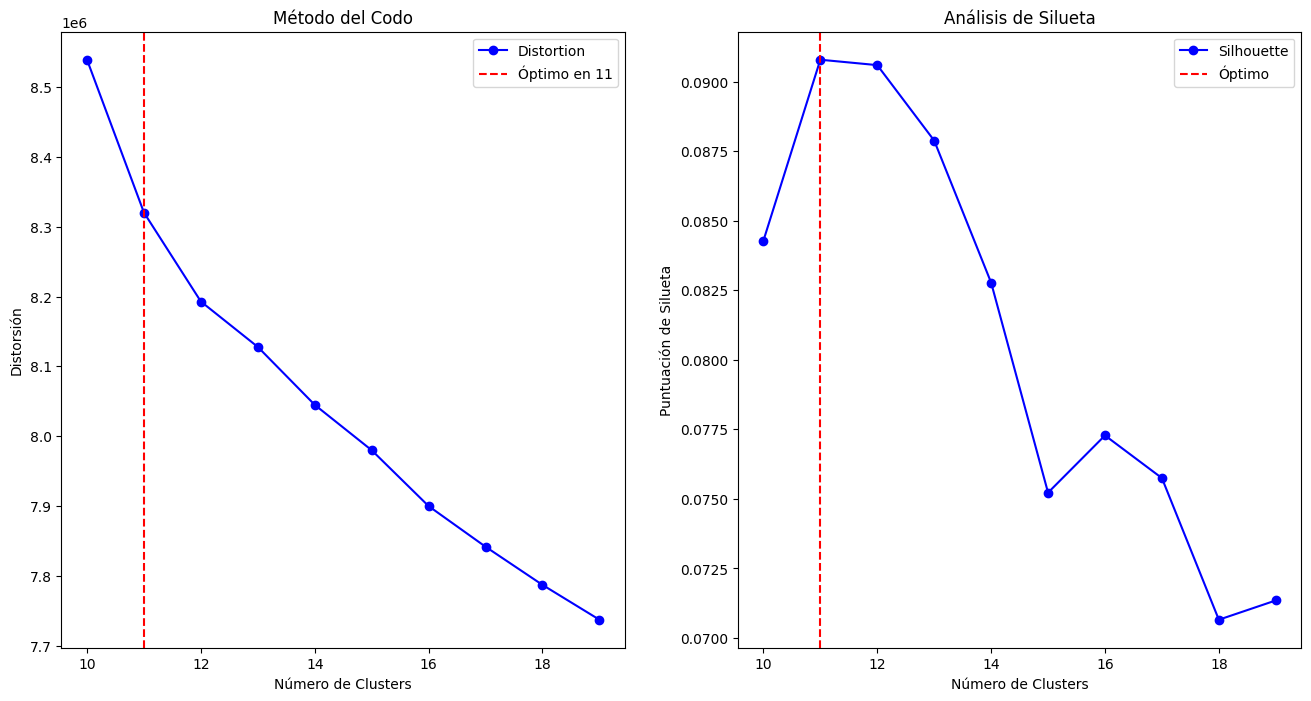

/home/fbaquero/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


NameError: name 'OffsetImage' is not defined

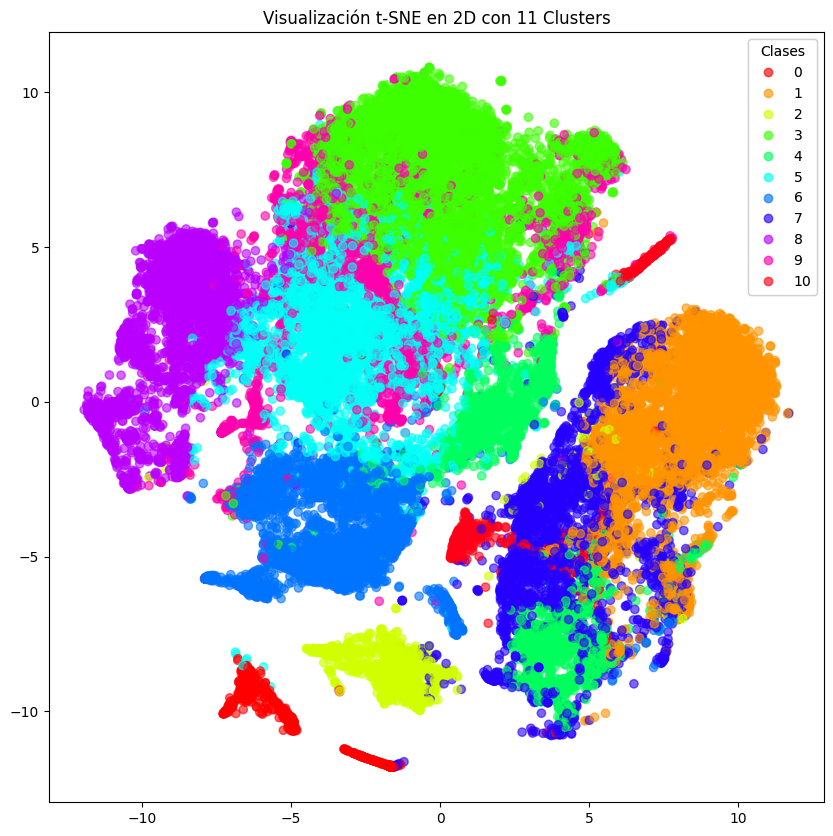

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
import jsonlines
import os
from PIL import Image
import random

# Configuración de rutas
features_file = '/home/fbaquero/tesis/tesisfinal/nodistorcion.jsonl'
root_dir = '/media/databases/tiputini/'

# Leer las características del archivo JSONL
features = []
image_paths = []
with jsonlines.open(features_file) as reader:
    for obj in reader:
        for detection in obj['detectors']['megadetectorV5']['output']['detections']:
            if 'features' in detection:
                features.append(detection['features'])
                image_paths.append(os.path.join(root_dir, obj['paths'][0]))

features = np.array(features)

# Método del Codo y Análisis de Silueta
def plot_elbow_silhouette(data, min_clusters=10, max_clusters=19, optimal_clusters=11):
    distortions = []
    silhouettes = []
    K = range(min_clusters, max_clusters + 1)
    
    for k in tqdm(K, desc="Calculando Elbow y Silhouette"):
        kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init='auto')
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        try:
            silhouette_avg = silhouette_score(data, kmeans.labels_)
        except ValueError:
            silhouette_avg = np.nan
        silhouettes.append(silhouette_avg)
    
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(K, distortions, 'bo-', label='Distortion')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Distorsión')
    plt.title('Método del Codo')

    # Agregamos una línea en el valor 11
    plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Óptimo en {optimal_clusters}')
    
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(K, silhouettes, 'bo-', label='Silhouette')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación de Silueta')
    plt.title('Análisis de Silueta')
    plt.axvline(x=K[np.nanargmax(silhouettes)], color='r', linestyle='--', label='Óptimo')
    plt.legend()
    
    plt.show()

# Visualización t-SNE en 2D con imágenes representativas por clúster
def plot_tsne_with_images(data, labels, image_paths, n_clusters=11):
    tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=300)
    tsne_results = tsne.fit_transform(data)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter = ax.scatter(
        tsne_results[:, 0], tsne_results[:, 1],
        c=labels, cmap='hsv', alpha=0.6
    )
    legend1 = ax.legend(*scatter.legend_elements(), title="Clases")
    ax.add_artist(legend1)
    ax.set_title(f'Visualización t-SNE en 2D con {n_clusters} Clusters')

    # Agregar imágenes representativas para cada clúster
    unique_labels = np.unique(labels)
    for label in unique_labels:
        label_indices = np.where(labels == label)[0]
        selected_index = random.choice(label_indices)
        x, y = tsne_results[selected_index, 0], tsne_results[selected_index, 1]
        
        img_path = image_paths[selected_index]
        img = Image.open(img_path)
        img.thumbnail((50, 50), Image.LANCZOS)
        imgbox = OffsetImage(img, zoom=0.5)
        ab = AnnotationBbox(imgbox, (x, y), frameon=False)
        ax.add_artist(ab)
    
    plt.show()

# Gráfica de BIC y AIC
def plot_bic_aic(data, min_clusters=10, max_clusters=19):
    bics = []
    aics = []
    K = range(min_clusters, max_clusters + 1)
    
    for k in tqdm(K, desc="Calculando BIC y AIC"):
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data)
        bics.append(gmm.bic(data))
        aics.append(gmm.aic(data))
    
    plt.figure(figsize=(16, 8))
    plt.plot(K, bics, 'bo-', label='BIC')
    plt.plot(K, aics, 'go-', label='AIC')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación')
    plt.title('BIC y AIC para diferentes números de clusters')
    plt.axvline(x=K[np.argmin(bics)], color='r', linestyle='--', label='BIC Óptimo')
    plt.axvline(x=K[np.argmin(aics)], color='b', linestyle='--', label='AIC Óptimo')
    plt.legend()
    plt.show()

# Ejecutar los análisis y visualizaciones
plot_elbow_silhouette(features, optimal_clusters=11)
optimal_clusters = 11  # Basado en el análisis

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, init='k-means++', n_init='auto')
labels = kmeans.fit_predict(features)
plot_tsne_with_images(features, labels, image_paths, n_clusters=optimal_clusters)
plot_bic_aic(features)


In [ ]:
# Ejecutar el análisis GMM y visualización t-SNE con imágenes
def plot_tsne_with_gmm(data, labels, image_paths, n_clusters=11):
    tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=300)
    tsne_results = tsne.fit_transform(data)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter = ax.scatter(
        tsne_results[:, 0], tsne_results[:, 1],
        c=labels, cmap='hsv', alpha=0.6
    )
    legend1 = ax.legend(*scatter.legend_elements(), title="Clases")
    ax.add_artist(legend1)
    ax.set_title(f'Visualización t-SNE en 2D con {n_clusters} Clusters usando GMM')

    # Agregar imágenes representativas para cada clúster
    unique_labels = np.unique(labels)
    for label in unique_labels:
        label_indices = np.where(labels == label)[0]
        selected_index = random.choice(label_indices)
        x, y = tsne_results[selected_index, 0], tsne_results[selected_index, 1]
        
        img_path = image_paths[selected_index]
        img = Image.open(img_path)
        img.thumbnail((50, 50), Image.LANCZOS)
        imgbox = OffsetImage(img, zoom=0.5)
        ab = AnnotationBbox(imgbox, (x, y), frameon=False)
        ax.add_artist(ab)
    
    plt.show()

# Ejecución del análisis GMM
optimal_clusters = 11  # Basado en el análisis previo o BIC/AIC
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
labels = gmm.fit_predict(features)

# Visualización usando t-SNE y GMM
plot_tsne_with_gmm(features, labels, image_paths, n_clusters=optimal_clusters)
plot_bic_aic(features)


/home/fbaquero/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


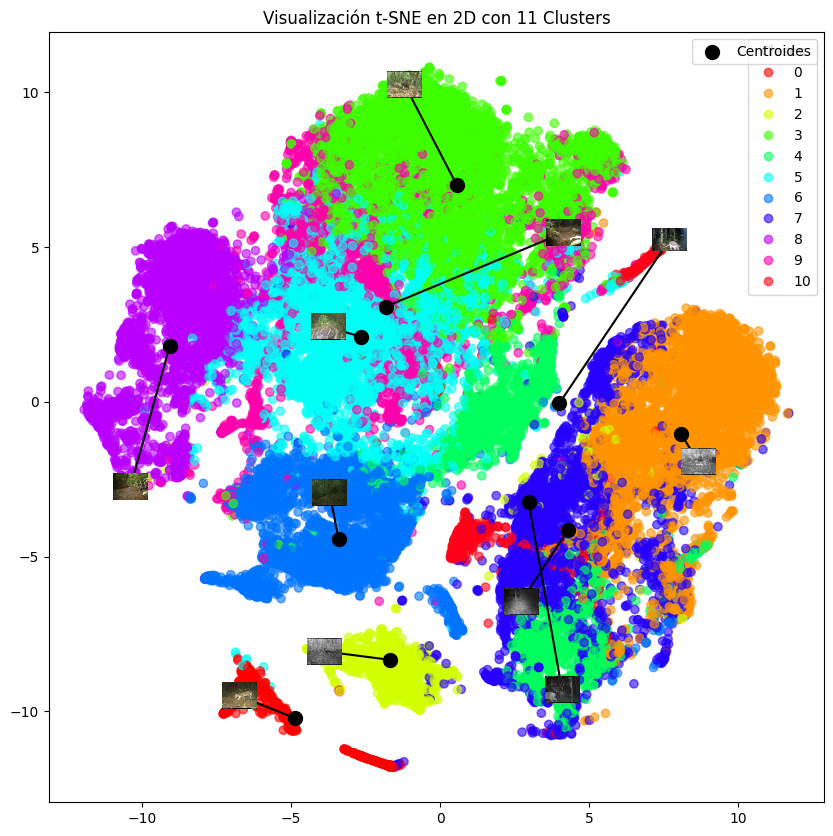

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from PIL import Image
from tqdm import tqdm
import jsonlines
import os
import random
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Configuración de rutas
features_file = '/home/fbaquero/tesis/tesisfinal/nodistorcion.jsonl'
root_dir = '/media/databases/tiputini/'

# Leer las características del archivo JSONL
features = []
image_paths = []
with jsonlines.open(features_file) as reader:
    for obj in reader:
        for detection in obj['detectors']['megadetectorV5']['output']['detections']:
            if 'features' in detection:
                features.append(detection['features'])
                image_paths.append(os.path.join(root_dir, obj['paths'][0]))

features = np.array(features)

# Aplicar KMeans para obtener etiquetas de clusters
optimal_clusters = 11  # Ajusta según el análisis de codo o silueta
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, init='k-means++', n_init='auto')
labels = kmeans.fit_predict(features)

# Función para visualizar t-SNE en 2D con imágenes y centroides
def plot_tsne_with_images_and_centroids(data, labels, image_paths, n_clusters=11):
    # Realizamos la transformación t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=300)
    tsne_results = tsne.fit_transform(data)
    
    # Creamos el gráfico de dispersión t-SNE
    fig, ax = plt.subplots(figsize=(10, 10))
    scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='hsv', alpha=0.6)
    legend1 = ax.legend(*scatter.legend_elements(), title="Clases")
    ax.add_artist(legend1)
    ax.set_title(f'Visualización t-SNE en 2D con {n_clusters} Clusters')

    # Calculamos los centroides de cada clúster
    centroids = []
    for label in np.unique(labels):
        cluster_points = tsne_results[labels == label]
        centroid = cluster_points.mean(axis=0)
        centroids.append(centroid)
        
        # Seleccionamos una imagen representativa al azar para el clúster
        label_indices = np.where(labels == label)[0]
        selected_index = random.choice(label_indices)
        img_path = image_paths[selected_index]
        img = Image.open(img_path)
        img.thumbnail((50, 50), Image.LANCZOS)
        
        # Agregamos la imagen representativa con una línea desde el centroide
        ax.plot([centroid[0], tsne_results[selected_index, 0]], 
                [centroid[1], tsne_results[selected_index, 1]], 'k-')  # Línea desde el centroide
        imgbox = OffsetImage(img, zoom=0.5)
        ab = AnnotationBbox(imgbox, (tsne_results[selected_index, 0], tsne_results[selected_index, 1]), frameon=False)
        ax.add_artist(ab)
    
    # Dibujamos los puntos de los centroides en el gráfico
    centroids = np.array(centroids)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='o', label='Centroides')
    plt.legend()
    plt.show()

# Ejecutar la visualización con centroides y líneas
plot_tsne_with_images_and_centroids(features, labels, image_paths, n_clusters=optimal_clusters)


Puntuación de Silueta para GMM con 8 componentes: 0.0869


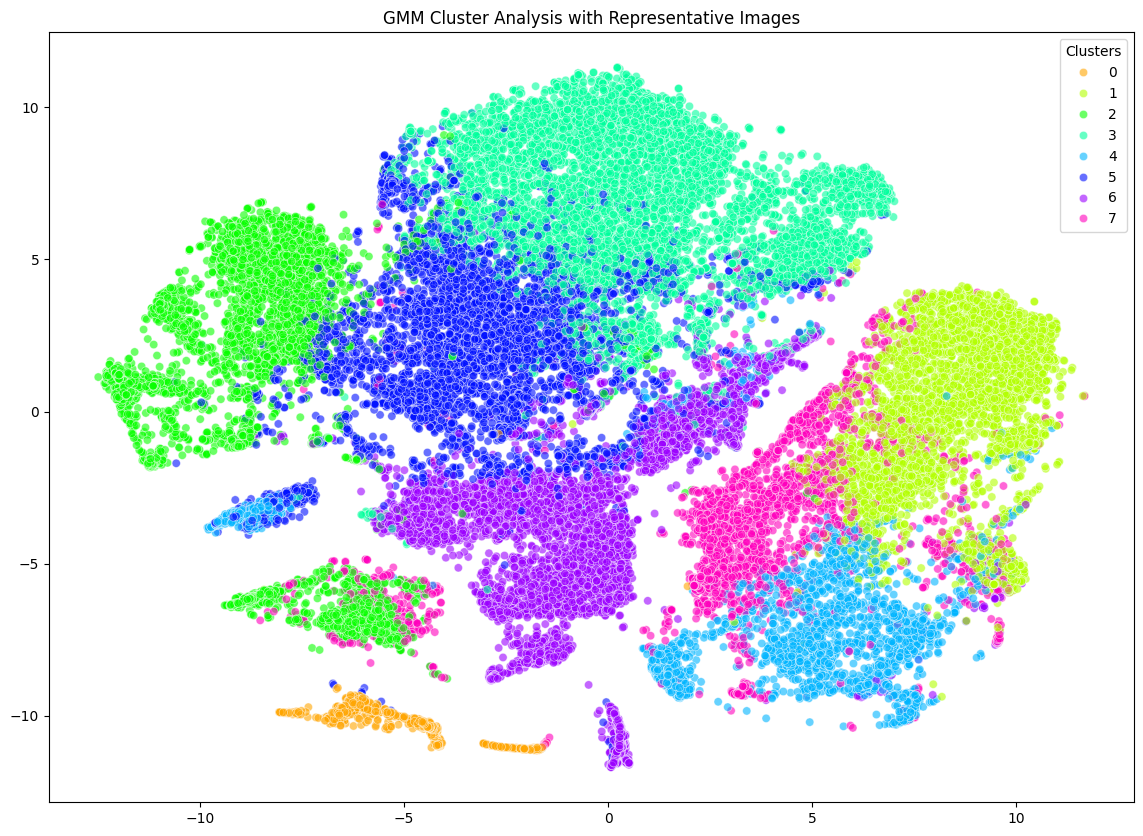

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import jsonlines
import random
from PIL import Image
import os

# Configuración de rutas
features_file = '/home/fbaquero/tesis/tesisfinal/nodistorcion.jsonl'
root_dir = '/media/databases/tiputini/'

# Leer las características e imágenes del archivo JSONL
features = []
images = []
with jsonlines.open(features_file) as reader:
    for obj in reader:
        for detection in obj['detectors']['megadetectorV5']['output']['detections']:
            if 'features' in detection:
                features.append(detection['features'])
                if 'image_path' in detection:  # Solo añadimos si existe 'image_path'
                    images.append(detection['image_path'])
                else:
                    images.append(None)  # Para mantener el tamaño de 'features' y 'images' igual

features = np.array(features)

# Verificación de consistencia
if len(features) != len(images):
    print("Advertencia: El número de características y de imágenes no coincide.")
    # Opcional: podrías recortar o ajustar aquí si es necesario

# Ajuste del modelo GMM
optimal_clusters = 8  # Usa el número óptimo que encontraste previamente
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm.fit_predict(features)

# Calcular y mostrar la puntuación de silueta
silhouette_avg = silhouette_score(features, gmm_labels)
print(f"Puntuación de Silueta para GMM con {optimal_clusters} componentes: {silhouette_avg:.4f}")

# Visualización con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)  # Usamos max_iter en lugar de n_iter
tsne_results = tsne.fit_transform(features)

# Elegir una imagen representativa aleatoria para cada clúster
representative_images = {}
for cluster_id in np.unique(gmm_labels):
    cluster_indices = np.where(gmm_labels == cluster_id)[0]
    
    # Encontrar una imagen válida en el clúster
    valid_indices = [i for i in cluster_indices if images[i] is not None]
    if valid_indices:  # Solo si hay imágenes válidas
        random_index = random.choice(valid_indices)
        representative_images[cluster_id] = images[random_index]

# Graficar los resultados de t-SNE con las imágenes representativas
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=gmm_labels,
    palette=sns.color_palette("hsv", optimal_clusters),
    legend="full",
    alpha=0.6
)

# Añadir imágenes representativas de cada clúster
for cluster_id, image_path in representative_images.items():
    # Cargar la imagen
    img_path_full = os.path.join(root_dir, image_path)
    try:
        img = Image.open(img_path_full)
        img.thumbnail((64, 64), Image.ANTIALIAS)  # Ajustar el tamaño de la imagen para que sea visible
        
        # Obtener la posición media del clúster para colocar la imagen
        cluster_points = tsne_results[gmm_labels == cluster_id]
        x_mean, y_mean = cluster_points.mean(axis=0)
        
        # Mostrar la imagen en la posición media del clúster
        plt.imshow(img, aspect='auto', extent=(x_mean - 15, x_mean + 15, y_mean - 15, y_mean + 15), zorder=2)
        
        # Etiquetar el clúster
        plt.text(x_mean, y_mean + 20, f"Cluster {cluster_id}", ha='center', fontsize=9, fontweight='bold')
    except FileNotFoundError:
        print(f"Imagen no encontrada: {img_path_full}")

plt.title('GMM Cluster Analysis with Representative Images')
plt.legend(title='Clusters')
plt.show()


Puntuación de Silueta para GMM con 11 componentes: 0.0908


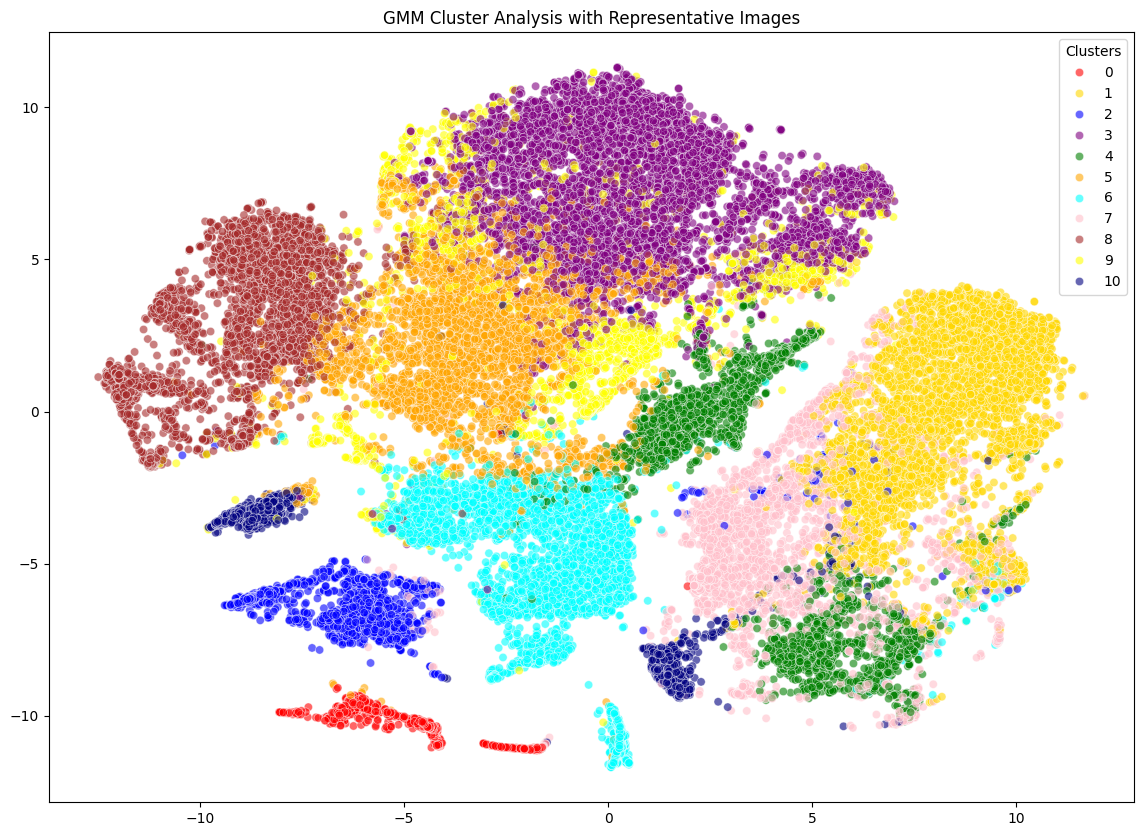

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import jsonlines
import random
from PIL import Image
import os

# Configuración de rutas
features_file = '/home/fbaquero/tesis/tesisfinal/nodistorcion.jsonl'
root_dir = '/media/databases/tiputini/'

# Leer las características e imágenes del archivo JSONL
features = []
images = []
with jsonlines.open(features_file) as reader:
    for obj in reader:
        for detection in obj['detectors']['megadetectorV5']['output']['detections']:
            if 'features' in detection:
                features.append(detection['features'])
                if 'image_path' in detection:
                    images.append(detection['image_path'])
                else:
                    images.append(None)

features = np.array(features)

# Verificación de consistencia
if len(features) != len(images):
    print("Advertencia: El número de características y de imágenes no coincide.")

# Ajuste del modelo GMM
optimal_clusters = 11
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm.fit_predict(features)

# Calcular y mostrar la puntuación de silueta
silhouette_avg = silhouette_score(features, gmm_labels)
print(f"Puntuación de Silueta para GMM con {optimal_clusters} componentes: {silhouette_avg:.4f}")

# Visualización con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
tsne_results = tsne.fit_transform(features)

# Elegir una imagen representativa aleatoria para cada clúster
representative_images = {}
for cluster_id in np.unique(gmm_labels):
    cluster_indices = np.where(gmm_labels == cluster_id)[0]
    valid_indices = [i for i in cluster_indices if images[i] is not None]
    if valid_indices:
        random_index = random.choice(valid_indices)
        representative_images[cluster_id] = images[random_index]

colors = [
    '#FF0000',  # Red
    '#FFD700',  # Yellow
    '#0000FF',  # Blue
    '#800080',  # Purple
    '#008000',  # Green
    '#FFA500',  # Orange
    '#00FFFF',  # Cyan
    '#FFC0CB',  # Pink
    '#A52A2A',  # Brown
    '#FFFF00',  # Light Yellow
    '#000080'   # Navy
]

# Graficar los resultados de t-SNE con las imágenes representativas y los centroides
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=gmm_labels,
    palette=colors,
    legend="full",
    alpha=0.6
)

# Añadir imágenes representativas y centroides de cada clúster
for cluster_id, image_path in representative_images.items():
    img_path_full = os.path.join(root_dir, image_path)
    try:
        img = Image.open(img_path_full)
        img.thumbnail((64, 64), Image.ANTIALIAS)
        
        # Obtener la posición media del clúster y añadir una X
        cluster_points = tsne_results[gmm_labels == cluster_id]
        x_mean, y_mean = cluster_points.mean(axis=0)
        
        # Añadir la imagen
        plt.imshow(img, aspect='auto', extent=(x_mean - 15, x_mean + 15, y_mean - 15, y_mean + 15), zorder=2)
        
        # Borde alrededor de la imagen
        plt.gca().add_patch(plt.Rectangle((x_mean - 15, y_mean - 15), 30, 30, linewidth=2, edgecolor=colors[cluster_id], facecolor='none', zorder=3))
        
        # Marcar el centro con una "X"
        plt.scatter(x_mean, y_mean, color='black', marker='x', s=100, zorder=4)
        
        # Etiquetar el clúster
        plt.text(x_mean, y_mean + 20, f"Cluster {cluster_id}", ha='center', fontsize=9, fontweight='bold')
    except FileNotFoundError:
        print(f"Imagen no encontrada: {img_path_full}")

plt.title('GMM Cluster Analysis with Representative Images')
plt.legend(title='Clusters')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
import jsonlines
import random
from PIL import Image
import os

# Configuración de rutas
features_file = '/home/fbaquero/tesis/tesisfinal/nodistorcion.jsonl'
root_dir = '/media/databases/tiputini/'

# Leer las características e imágenes del archivo JSONL
features = []
images = []
with jsonlines.open(features_file) as reader:
    for obj in reader:
        for detection in obj['detectors']['megadetectorV5']['output']['detections']:
            if 'features' in detection:
                features.append(detection['features'])
                if 'image_path' in detection:
                    images.append(detection['image_path'])
                else:
                    images.append(None)

features = np.array(features)

# Verificación de consistencia
if len(features) != len(images):
    print("Advertencia: El número de características y de imágenes no coincide.")

# Ajuste del modelo GMM con 11 clústeres
optimal_clusters = 5

gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gmm_labels = gmm.fit_predict(features)

# Calcular y mostrar la puntuación de silueta
silhouette_avg = silhouette_score(features, gmm_labels)
print(f"Puntuación de Silueta para GMM con {optimal_clusters} componentes: {silhouette_avg:.4f}")

# Visualización con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
tsne_results = tsne.fit_transform(features)

# Elegir una imagen representativa aleatoria para cada clúster
representative_images = {}
for cluster_id in np.unique(gmm_labels):
    cluster_indices = np.where(gmm_labels == cluster_id)[0]
    valid_indices = [i for i in cluster_indices if images[i] is not None]
    if valid_indices:
        random_index = random.choice(valid_indices)
        representative_images[cluster_id] = images[random_index]

# Colores vivos para 11 clústeres
colors = ['red','blue', 'purple', 
    'green', 'pink', 'magenta',
    'lime', 'navy', 'gold', 'coral', 'salmon',
    'teal', 'turquoise', 'violet', 'black']

# Graficar los resultados de t-SNE con las imágenes representativas y los centroides
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=gmm_labels,
    palette=colors,
    legend="full",
    alpha=0.6
)

# Añadir imágenes representativas y centroides de cada clúster
for cluster_id, image_path in representative_images.items():
    img_path_full = os.path.join(root_dir, image_path)
    try:
        img = Image.open(img_path_full)
        img.thumbnail((64, 64), Image.ANTIALIAS)
        
        # Obtener la posición media del clúster y añadir una X grande
        cluster_points = tsne_results[gmm_labels == cluster_id]
        x_mean, y_mean = cluster_points.mean(axis=0)
        
        # Añadir la imagen
        plt.imshow(img, aspect='auto', extent=(x_mean - 15, x_mean + 15, y_mean - 15, y_mean + 15), zorder=2)
        
        # Borde alrededor de la imagen
        plt.gca().add_patch(plt.Rectangle((x_mean - 15, y_mean - 15), 30, 30, linewidth=2, edgecolor=colors[cluster_id], facecolor='none', zorder=3))
        
        # Marcar el centro con una "X" grande
        plt.scatter(x_mean, y_mean, color='black', marker='x', s=200, zorder=4)
        
        # Etiquetar el clúster
        plt.text(x_mean, y_mean + 20, f"Cluster {cluster_id}", ha='center', fontsize=9, fontweight='bold')
    except FileNotFoundError:
        print(f"Imagen no encontrada: {img_path_full}")

plt.title('GMM Cluster Analysis with Representative Images')
plt.legend(title='Clusters')
plt.show()

# Imprimir cada imagen representativa de cada clúster
print("Imágenes representativas de cada clúster:")
for cluster_id, image_path in representative_images.items():
    img_path_full = os.path.join(root_dir, image_path)
    try:
        img = Image.open(img_path_full)
        img.show(title=f"Cluster {cluster_id}")  # Abre la imagen en el visor de imágenes predeterminado del sistema
        print(f"Cluster {cluster_id}: {img_path_full}")
    except FileNotFoundError:
        print(f"Imagen no encontrada: {img_path_full}")


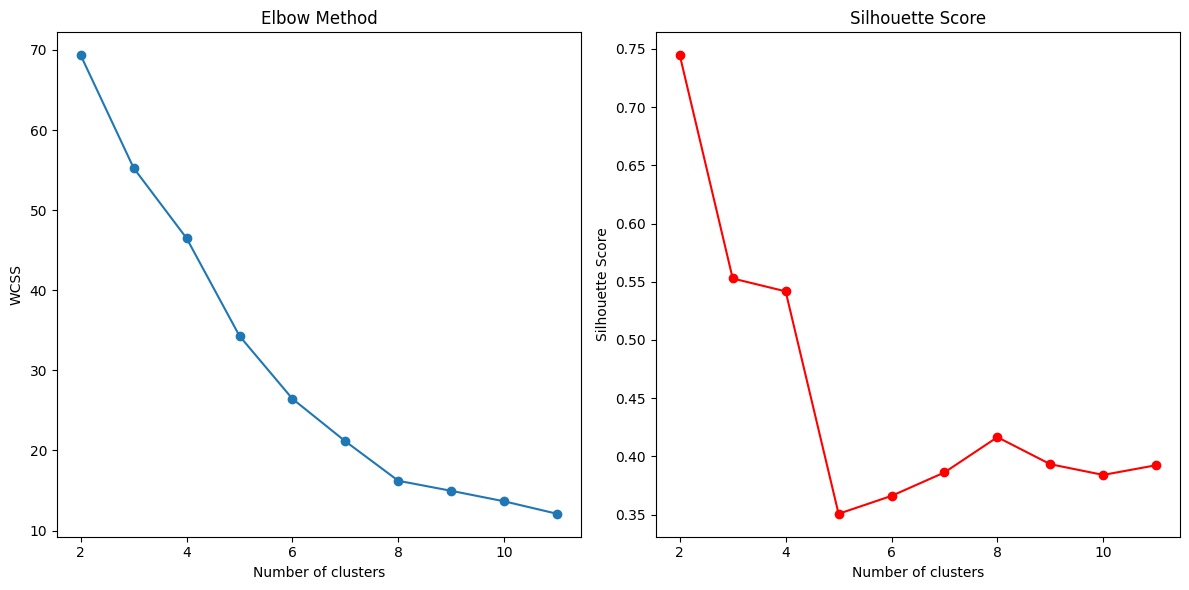

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sample data generation
np.random.seed(0)
x = -2 * np.random.rand(100, 2)
x1 = 1 + 2 * np.random.rand(50, 2)
x[50:100, :] = x1

# Variables to store results
wcss = []  # Within-cluster sum of squares
silhouette_scores = []

# Range of potential clusters
cluster_range = range(2, 12)  # Starting from 2 to avoid error in silhouette calculation

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(x)
    labels = kmeans.labels_
    
    # WCSS (Elbow method)
    wcss.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_scores.append(silhouette_score(x, labels))

# Plotting the Elbow Curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


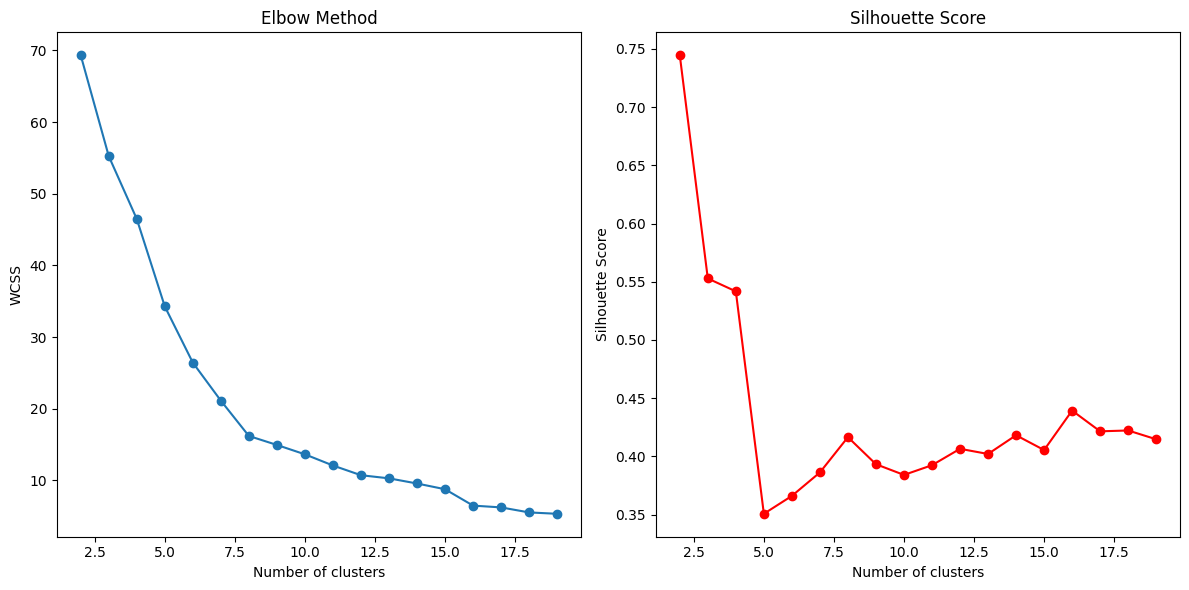

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Sample data generation
np.random.seed(0)
x = -2 * np.random.rand(100, 2)
x1 = 1 + 2 * np.random.rand(50, 2)
x[50:100, :] = x1

# Variables to store results
wcss = []  # Within-cluster sum of squares
silhouette_scores = []

# Range of potential clusters
cluster_range = range(2, 20)  # Starting from 2 to avoid error in silhouette calculation

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(x)
    labels = kmeans.labels_
    
    # WCSS (Elbow method)
    wcss.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_scores.append(silhouette_score(x, labels))

# Plotting the Elbow Curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='red')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


Fitting GMM models: 100%|██████████████████████████████████████████████████████████████| 20/20 [49:13<00:00, 147.70s/it]


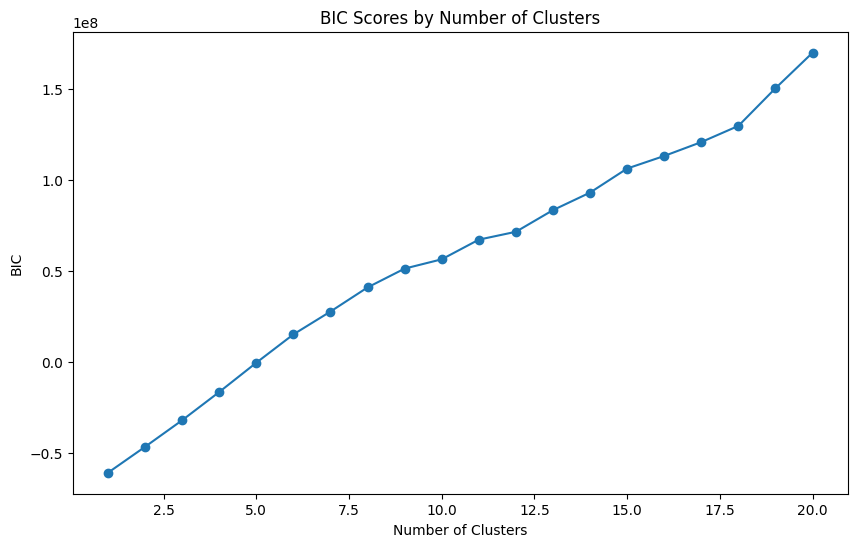

The optimal number of clusters based on BIC is: 1
Computed maximum probabilities of cluster membership.


In [7]:
import jsonlines
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
import random

# Configuration of paths
features_file = '/home/fbaquero/tesis/tesisfinal/nodistorcion.jsonl'

# Read features from JSONL file
features = []
with jsonlines.open(features_file) as reader:
    for obj in reader:
        for detection in obj['detectors']['megadetectorV5']['output']['detections']:
            if 'features' in detection:
                features.append(detection['features'])

features = np.array(features)

# Sample the dataset if it's too large
sample_size = 20000
if len(features) > sample_size:
    features = features[random.sample(range(len(features)), sample_size)]

# Function to fit GMM and find the best number of clusters based on BIC
def find_optimal_clusters(data, max_clusters=20):
    bics = []
    K = range(1, max_clusters + 1)
    best_gmm = None
    
    for k in tqdm(K, desc="Fitting GMM models"):
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(data)
        bics.append(gmm.bic(data))
        if k == 1 or gmm.bic(data) < min(bics[:-1]):
            best_gmm = gmm
    
    plt.figure(figsize=(10, 6))
    plt.plot(K, bics, marker='o', linestyle='-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('BIC')
    plt.title('BIC Scores by Number of Clusters')
    plt.show()
    
    best_k = K[np.argmin(bics)]
    print(f"The optimal number of clusters based on BIC is: {best_k}")

    # Compute the maximum probability of belonging to an assigned cluster
    if best_gmm:
        probabilities = best_gmm.predict_proba(data)
        max_probabilities = probabilities.max(axis=1)
        print("Computed maximum probabilities of cluster membership.")

    return best_gmm, max_probabilities

# Execute the function to find the optimal number of clusters
best_model, max_probabilities = find_optimal_clusters(features)
